In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import plot_confusion_matrix, compute_sparsity
from sklearn.cluster import KMeans
from ucimlrepo import fetch_ucirepo
from convex_nmf import convex_nmf
from sklearn.metrics import accuracy_score

In [2]:
# fetch dataset 
ionosphere = fetch_ucirepo(id=52) 
  
# data (as pandas dataframes) 
X = ionosphere.data.features # num_samples x num_features
y = ionosphere.data.targets
y = [1 if label == 'g' else 0 for label in y['Class']]

In [3]:
kmeans_clustering_accuracies = []
random_state = 22
for i in range(50):
    kmeans = KMeans(n_clusters=2, tol = 0.001, random_state = random_state * i)
    kmeans_labels = kmeans.fit_predict(X)
    #plot_confusion_matrix(y_true = y, y_pred = kmeans_labels, normalize = True)
    accuracy = accuracy_score(y_true = y, y_pred = kmeans_labels)
    print(f"Total iterations for kmeans: {kmeans.n_iter_}. Accuracy on iteration {i}: {accuracy}")
    kmeans_clustering_accuracies.append(accuracy)

print(f'Average accuracy: {np.mean(kmeans_clustering_accuracies)}')

Total iterations for kmeans: 4. Accuracy on iteration 0: 0.7122507122507122
Total iterations for kmeans: 5. Accuracy on iteration 1: 0.2905982905982906
Total iterations for kmeans: 5. Accuracy on iteration 2: 0.28774928774928776
Total iterations for kmeans: 6. Accuracy on iteration 3: 0.28774928774928776
Total iterations for kmeans: 6. Accuracy on iteration 4: 0.7122507122507122
Total iterations for kmeans: 7. Accuracy on iteration 5: 0.2905982905982906
Total iterations for kmeans: 9. Accuracy on iteration 6: 0.28774928774928776
Total iterations for kmeans: 14. Accuracy on iteration 7: 0.28774928774928776
Total iterations for kmeans: 5. Accuracy on iteration 8: 0.7122507122507122
Total iterations for kmeans: 13. Accuracy on iteration 9: 0.7122507122507122
Total iterations for kmeans: 5. Accuracy on iteration 10: 0.2905982905982906
Total iterations for kmeans: 5. Accuracy on iteration 11: 0.7094017094017094
Total iterations for kmeans: 5. Accuracy on iteration 12: 0.28774928774928776
To

In [5]:
convex_nmf_clustering_accuracies = []
for i in range(0, 50):
    F, W, G_T, residual_vector = convex_nmf(X = np.array(X.T), r=2, tol=1e-4, max_iter=5000, random_state=random_state * i)
    convex_nmf_clusters = [0 if G_T[0, i] > G_T[1, i] else 1 for i in range(351)]
    #plot_confusion_matrix(y_true = y, y_pred = convex_nmf_clusters, normalize = True)
    accuracy = accuracy_score(y_true=y, y_pred=convex_nmf_clusters)
    print(f'Accuracy on iteration {i}: {accuracy}')
    convex_nmf_clustering_accuracies.append(accuracy)

print(f'Average accuracy: {np.mean(convex_nmf_clustering_accuracies)}')

  1%|          | 34/5000 [00:00<00:10, 461.79it/s]


Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 0: 0.6210826210826211


  1%|          | 34/5000 [00:00<00:07, 667.31it/s]


Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548
Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Accuracy on iteration 1: 0.3789173789173789


  1%|          | 34/5000 [00:00<00:08, 610.08it/s]


Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 2: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 568.18it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 3: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 573.10it/s]


Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 4: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443


  1%|          | 34/5000 [00:00<00:08, 575.68it/s]


Relative error at iteration 20: 0.0003553023703580548
Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Accuracy on iteration 5: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:08, 579.55it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 6: 0.3789173789173789



  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:12, 412.45it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 7: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465


  1%|          | 34/5000 [00:00<00:08, 594.49it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 8: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465


  1%|          | 34/5000 [00:00<00:07, 662.07it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 9: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548


  1%|          | 34/5000 [00:00<00:07, 625.84it/s]


Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Accuracy on iteration 10: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548
Relative error at iteration 30: 0.00013011131771585487


  1%|          | 34/5000 [00:00<00:09, 537.60it/s]


Convergence achieved at iteration 34...
Accuracy on iteration 11: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376


  1%|          | 34/5000 [00:00<00:08, 602.67it/s]


Convergence achieved at iteration 34...
Accuracy on iteration 12: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443


  1%|          | 34/5000 [00:00<00:08, 593.49it/s]


Relative error at iteration 20: 0.0003553023703580548
Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Accuracy on iteration 13: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548


  1%|          | 34/5000 [00:00<00:12, 390.29it/s]


Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Accuracy on iteration 14: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 596.06it/s]


Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 15: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:07, 631.83it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 16: 0.3789173789173789


  1%|          | 34/5000 [00:00<00:07, 632.71it/s]

Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 17: 0.6210826210826211



  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:07, 629.86it/s]


Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 18: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 584.27it/s]

Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 19: 0.6210826210826211



  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548


  1%|          | 34/5000 [00:00<00:08, 587.89it/s]


Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Accuracy on iteration 20: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 602.53it/s]


Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 21: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:07, 637.44it/s]

Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...


Accuracy on iteration 22: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 599.37it/s]


Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 23: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:09, 520.06it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 24: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465


  1%|          | 34/5000 [00:00<00:08, 580.92it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 25: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:08, 588.70it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...


Accuracy on iteration 26: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465


  1%|          | 34/5000 [00:00<00:07, 654.36it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 27: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 616.14it/s]

Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 28: 0.3789173789173789



  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548
Relative error at iteration 30: 0.00013011131771585487


  1%|          | 34/5000 [00:00<00:12, 391.80it/s]


Convergence achieved at iteration 34...
Accuracy on iteration 29: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:08, 583.93it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 30: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548


  1%|          | 34/5000 [00:00<00:08, 564.71it/s]


Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Accuracy on iteration 31: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 597.24it/s]


Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 32: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 587.73it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 33: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616


  1%|          | 34/5000 [00:00<00:08, 559.04it/s]

Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 34: 0.3789173789173789



  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159


  1%|          | 34/5000 [00:00<00:09, 515.00it/s]


Convergence achieved at iteration 34...
Accuracy on iteration 35: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548
Relative error at iteration 30: 0.00013011131771585487


  1%|          | 34/5000 [00:00<00:12, 383.17it/s]


Convergence achieved at iteration 34...
Accuracy on iteration 36: 0.3789173789173789


  1%|          | 34/5000 [00:00<00:08, 617.90it/s]


Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 37: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 559.88it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 38: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 570.01it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 39: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465


  1%|          | 34/5000 [00:00<00:08, 597.78it/s]


Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 40: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548


  1%|          | 34/5000 [00:00<00:08, 589.10it/s]


Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Accuracy on iteration 41: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 592.84it/s]


Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 42: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0008213653297618371
Relative error at iteration 20: 0.0005485310407248677
Relative error at iteration 30: 0.0020229322683386125
Relative error at iteration 40: 0.005683924640747635


  1%|          | 46/5000 [00:00<00:10, 459.34it/s]

Relative error at iteration 50: 0.004802611264660186
Relative error at iteration 60: 0.001278071554903299
Relative error at iteration 70: 0.0009641109213513107
Relative error at iteration 80: 0.0008678116556392196
Relative error at iteration 90: 0.00037773880224348163
Relative error at iteration 100: 0.0001767897353693308


  3%|▎         | 135/5000 [00:00<00:08, 550.14it/s]


Relative error at iteration 110: 0.00014720875409946762
Relative error at iteration 120: 0.0002099802845171666
Relative error at iteration 130: 0.00015198413104438015
Convergence achieved at iteration 135...
Accuracy on iteration 43: 0.4045584045584046


  1%|          | 34/5000 [00:00<00:07, 648.48it/s]


Relative error at iteration 10: 0.002126421967671443
Relative error at iteration 20: 0.0003553023703580548
Relative error at iteration 30: 0.00013011131771585487
Convergence achieved at iteration 34...
Accuracy on iteration 44: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 585.11it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 45: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 595.78it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 46: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931661465
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 587.87it/s]


Relative error at iteration 30: 0.0001300120866598159
Convergence achieved at iteration 34...
Accuracy on iteration 47: 0.6210826210826211


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704


  1%|          | 34/5000 [00:00<00:08, 611.62it/s]


Relative error at iteration 30: 0.00013001208666003376
Convergence achieved at iteration 34...
Accuracy on iteration 48: 0.3789173789173789


  0%|          | 0/5000 [00:00<?, ?it/s]

Relative error at iteration 10: 0.0020993245931663616
Relative error at iteration 20: 0.0003533896788895704
Relative error at iteration 30: 0.00013001208666003376


  1%|          | 34/5000 [00:00<00:11, 439.21it/s]

Convergence achieved at iteration 34...
Accuracy on iteration 49: 0.3789173789173789
Average accuracy: 0.48113960113960114


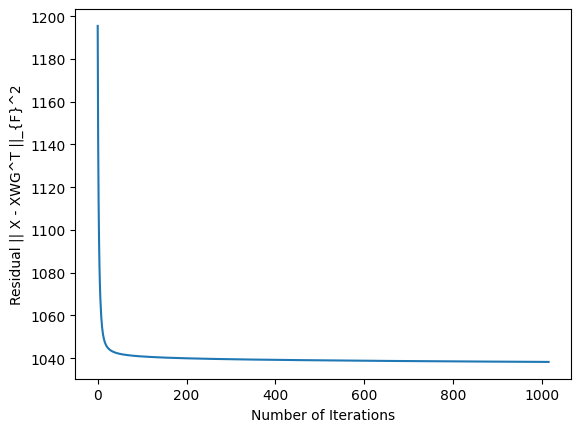

In [ ]:
plt.plot(residual_vector)
plt.xlabel('Number of Iterations')
plt.ylabel('Residual || X - XWG^T ||_{F}^2')
plt.show()